unique_refined_predictions:  {'Expansion.Conjunction': 2257, 'Comparison.Concession': 0, 'Temporal.Synchronous': 0, 'Contingency.Cause': 0, 'Contingency.Purpose': 0, 'Expansion.Manner': 0, 'Expansion.Instantiation': 0, 'Contingency.Condition': 0, 'Temporal.Asynchronous': 0, 'Expansion.Level-of-detail': 0, 'Comparison.Contrast': 0, 'Expansion.Substitution': 0, 'Contingency.Cause+Belief': 0, 'Expansion.Equivalence': 0, 'Contingency.Negative-cause': 0, 'Expansion.Disjunction': 0, 'Comparison.Similarity': 0, 'Expansion.Exception': 0, 'Comparison.Concession+SpeechAct': 0, 'Contingency.Condition+SpeechAct': 0, 'Hypophora': 0, 'Contingency.Negative-condition': 0, 'Contingency.Cause+SpeechAct': 0}
unique_refined_targets:  {'Comparison.Concession': 335, 'Temporal.Synchronous': 96, 'Contingency.Cause': 416, 'Expansion.Conjunction': 551, 'Contingency.Purpose': 46, 'Expansion.Manner': 40, 'Expansion.Instantiation': 99, 'Contingency.Condition': 76, 'Temporal.Asynchronous': 140, 'Expansion.Level-of-

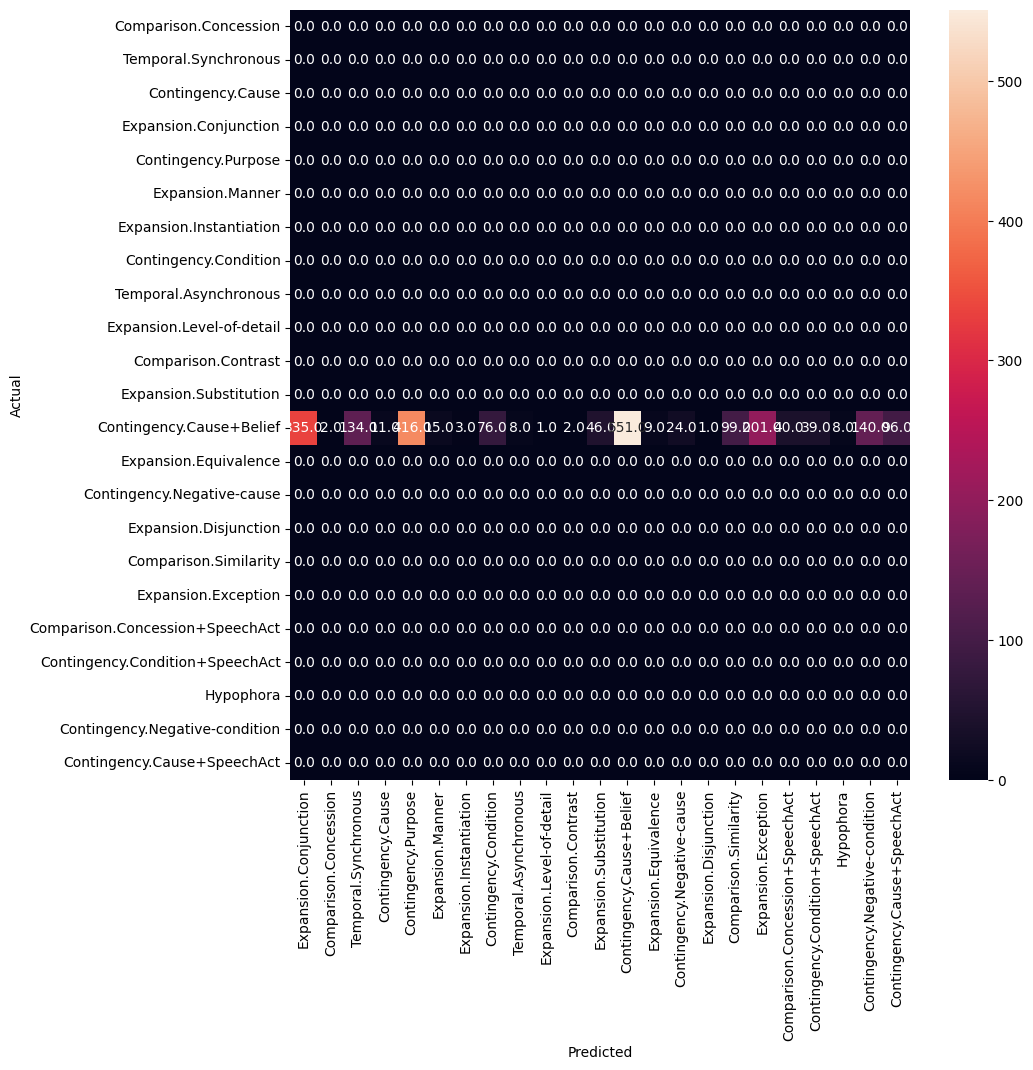

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#function to read predictions.csv in unrefined runs and refined_runs folders and return list of predictions and targets
def read_predictions_csv(path):
    df = pd.read_csv(path)
    df['rawpredictions'] = df['rawpredictions'].apply(lambda x: x[2:-2])
    df[' predictions'] = df[' predictions'].apply(lambda x: x[2:-2])
    df[' targets'] = df[' targets'].apply(lambda x: x[2:-2])
    return df[' predictions'], df[' targets'], df['rawpredictions']

#function to plot confusion matrix
def plot_confusion_matrix(predictions, targets):
    cm = confusion_matrix(predictions, targets)
    # cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='.1f', xticklabels=unique_refined_predictions, yticklabels=unique_refined_targets)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#count the number of predictions and targets for each unique prediction and target
def get_unique_predictions_targets(predictions, targets):
    unique_predictions = {}
    unique_targets = {}
    for i in range(len(predictions)):
        if predictions[i] not in unique_predictions:
            unique_predictions[predictions[i]] = 1
        else:
            unique_predictions[predictions[i]] += 1
        if targets[i] not in unique_targets:
            unique_targets[targets[i]] = 1
        else:
            unique_targets[targets[i]] += 1
    return unique_predictions, unique_targets

#given counts of unique predictions and targets, add the missing predictions and targets with count 0 in both dictionaries
def add_missing_predictions_targets(unique_predictions, unique_targets):
    for prediction in unique_predictions:
        if prediction not in unique_targets:
            unique_targets[prediction] = 0
    for target in unique_targets:
        if target not in unique_predictions:
            unique_predictions[target] = 0
    return unique_predictions, unique_targets


dataset = 'eng.pdtb.pdtb'
#read predictions and targets from unrefined runs and refined_runs folders
unrefined_predictions, unrefined_targets, x = read_predictions_csv('unrefined_runs/'+dataset+'/predictions.csv')
refined_predictions, refined_targets, x = read_predictions_csv('refined_runs/'+dataset+'/predictions.csv')



# print unique predictions and targets for refined runs
unique_refined_predictions, unique_refined_targets = get_unique_predictions_targets(refined_predictions, refined_targets)
unique_refined_predictions, unique_refined_targets = add_missing_predictions_targets(unique_refined_predictions, unique_refined_targets)
print('unique_refined_predictions: ', unique_refined_predictions)
print('unique_refined_targets: ', unique_refined_targets)

#plot confusion matrix for unrefined runs
plot_confusion_matrix(refined_predictions, refined_targets)

/home/VD/kaveri/anaconda3/envs/flant5_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label distribution:  {'elaboration': 95, 'motivation': 29, 'preparation': 19, 'conjunction': 19, 'circumstance': 16, 'nonvolitional-result': 14, 'nonvolitional-cause': 13, 'list': 12, 'concession': 12, 'justify': 10, 'sequence': 10, 'interpretation': 10, 'solutionhood': 8, 'condition': 8, 'contrast': 7, 'purpose': 6, 'evidence': 6, 'summary': 4, 'disjunction': 4, 'enablement': 4, 'means': 4, 'joint': 3, 'background': 3, 'evaluation': 2, 'restatement': 2, 'volitional-cause': 2, 'antithesis': 2, 'span': 1, 'otherwise': 1}


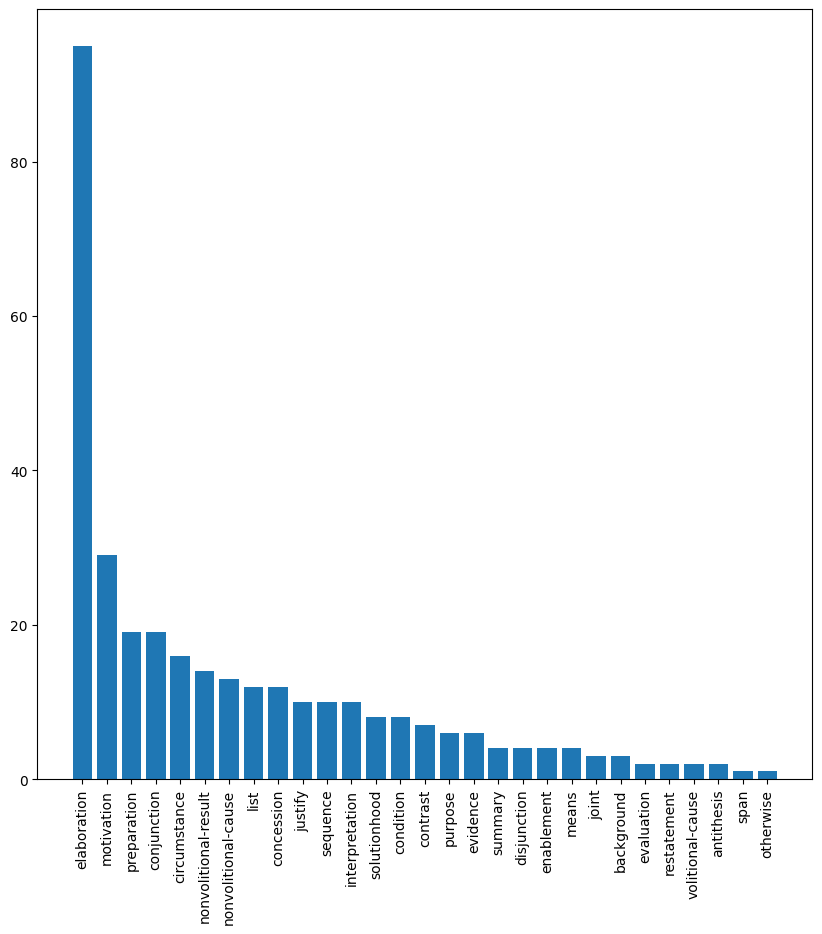

AssertionError: label not present in label distribution

In [2]:
from helper_fns.preprocessing import read_df_custom

#function to get label distribution from test_dataset and sort it
def get_label_distribution(test_dataset):
    label_distribution = {}
    for row in test_dataset.iterrows():
        row = row[1]
        label = row['label']
        if label not in label_distribution:
            label_distribution[label] = 1
        else:
            label_distribution[label] += 1
    label_distribution = dict(sorted(label_distribution.items(), key=lambda item: item[1], reverse=True))
    return label_distribution

#function to print and plot label distribution in a bar plot with rotated xticks
def print_plot_label_distribution(label_distribution):
    print('label distribution: ', label_distribution)
    plt.figure(figsize=(10,10))
    plt.bar(label_distribution.keys(), label_distribution.values())
    plt.xticks(rotation=90)
    plt.show()

#function to assert that a given label is present in the label distribution
def assert_label_in_label_distribution(label, label_distribution):
    assert label in label_distribution, 'label not present in label distribution'


#read the test dataset
parent_dir = '/home/VD/kaveri/sharedtask2021/data/'
dataset = 'nld.rst.nldt'
test_dataset = read_df_custom(parent_dir+dataset+'/'+dataset+'_test.rels')

#plot label distribution for test dataset
label_distribution = get_label_distribution(test_dataset)
print_plot_label_distribution(label_distribution)

#assert 'Hypophora' is present in label distribution
assert_label_in_label_distribution('Temporal.Asynchronous', label_distribution)

In [23]:
dataset_list = ['deu.rst.pcc', 'eng.dep.covdtb', 'eng.dep.scidtb', 'eng.pdtb.pdtb', 'eng.pdtb.tedm', 'eng.rst.gum', 'eng.rst.rstdt', 'eng.sdrt.stac', 'eus.rst.ert', 'fas.rst.prstc', 'fra.sdrt.annodis', 'ita.pdtb.luna', 'nld.rst.nldt', 'por.pdtb.crpc', 'por.pdtb.tedm', 'por.rst.cstn', 'rus.rst.rrt', 'spa.rst.rststb', 'spa.rst.sctb', 'tha.pdtb.tdtb', 'tur.pdtb.tdb', 'tur.pdtb.tedm', 'zho.dep.scidtb', 'zho.pdtb.cdtb', 'zho.rst.gcdt', 'zho.rst.sctb', ]

def accuracy(predictions, targets):
        # print(predictions, targets)
        correct = 0
        for i in range(len(predictions)):
            if predictions[i] == targets[i]:
                correct += 1
        return correct/len(predictions)

for dataset in dataset_list:
    #read predictions and targets from unrefined runs and refined_runs folders
    refined_predictions, refined_targets, refined_rawpredictions = read_predictions_csv('refined_runs/'+dataset+'/predictions.csv') 
    print('dataset: ', dataset, 'refined accuracy: ', accuracy(refined_predictions, refined_targets), '\traw refined accuracy: ', accuracy(refined_rawpredictions, refined_targets))

dataset:  deu.rst.pcc refined accuracy:  0.13076923076923078 	raw refined accuracy:  0.0
dataset:  eng.dep.covdtb refined accuracy:  0.5015467904098995 	raw refined accuracy:  0.0
dataset:  eng.dep.scidtb refined accuracy:  0.3411826268969126 	raw refined accuracy:  0.0
dataset:  eng.pdtb.pdtb refined accuracy:  0.24412937527691625 	raw refined accuracy:  0.0
dataset:  eng.pdtb.tedm refined accuracy:  0.33048433048433046 	raw refined accuracy:  0.0
dataset:  eng.rst.gum refined accuracy:  0.2539454806312769 	raw refined accuracy:  0.0
dataset:  eng.rst.rstdt refined accuracy:  0.36937354988399074 	raw refined accuracy:  0.0
dataset:  eng.sdrt.stac refined accuracy:  0.22649006622516557 	raw refined accuracy:  0.0
dataset:  eus.rst.ert refined accuracy:  0.2861356932153392 	raw refined accuracy:  0.07964601769911504
dataset:  fas.rst.prstc refined accuracy:  0.4543918918918919 	raw refined accuracy:  0.19594594594594594
dataset:  fra.sdrt.annodis refined accuracy:  0.1936 	raw refined a

/tmp/ipykernel_9132/2646373875.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(unique_refined_rawpredictions_engpdtb.keys(), rotation=90)
/tmp/ipykernel_9132/2646373875.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(unique_refined_rawpredictions_fas.keys(), rotation=90)
/tmp/ipykernel_9132/2646373875.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(unique_refined_rawpredictions_zho.keys(), rotation=90)


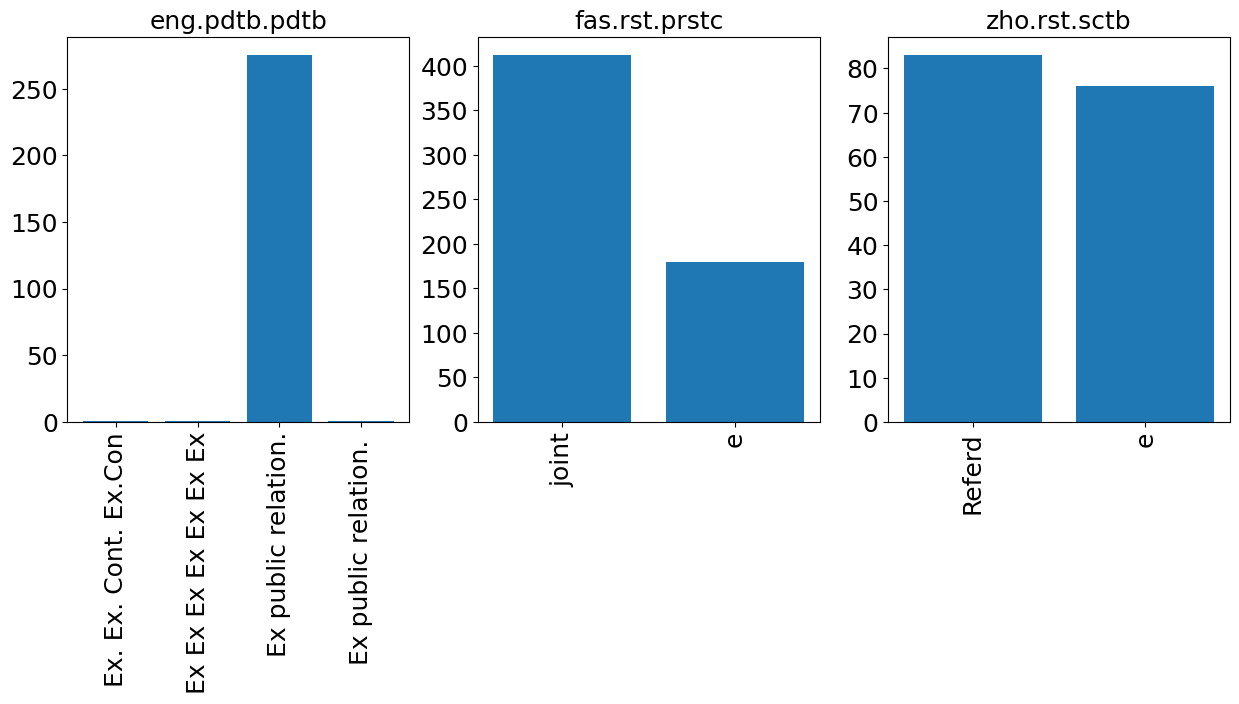

In [49]:
#get a count of unique refined_rawpredictions
def get_unique_refined_rawpredictions(refined_rawpredictions):
    unique_refined_rawpredictions = {}
    for prediction in refined_rawpredictions:
        if prediction not in unique_refined_rawpredictions:
            unique_refined_rawpredictions[prediction[:20]] = 1
        else:
            unique_refined_rawpredictions[prediction[:20]] += 1
    return unique_refined_rawpredictions

dataset = 'eng.pdtb.pdtb'
refined_predictions_engpdtb, refined_targets_engpdtb, refined_rawpredictions_engpdtb = read_predictions_csv('refined_runs/'+dataset+'/predictions.csv')
dataset = 'fas.rst.prstc'
refined_predictions_fas, refined_targets_fas, refined_rawpredictions_fas = read_predictions_csv('refined_runs/'+dataset+'/predictions.csv')
dataset = 'zho.rst.sctb'
refined_predictions_zho, refined_targets_zho, refined_rawpredictions_zho = read_predictions_csv('refined_runs/'+dataset+'/predictions.csv')

#get unique refined_rawpredictions for each dataset
unique_refined_rawpredictions_engpdtb = get_unique_refined_rawpredictions(refined_rawpredictions_engpdtb)
unique_refined_rawpredictions_fas = get_unique_refined_rawpredictions(refined_rawpredictions_fas)
unique_refined_rawpredictions_zho = get_unique_refined_rawpredictions(refined_rawpredictions_zho)

#plot three bar plots of unique refined_rawpredictions for each dataset in a single figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
# fig.suptitle('Unique refined_rawpredictions for each dataset')
ax1.bar(unique_refined_rawpredictions_engpdtb.keys(), unique_refined_rawpredictions_engpdtb.values())
ax1.set_xticklabels(unique_refined_rawpredictions_engpdtb.keys(), rotation=90)
ax1.set_title('eng.pdtb.pdtb')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
                ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(18)
ax2.bar(unique_refined_rawpredictions_fas.keys(), unique_refined_rawpredictions_fas.values())
ax2.set_xticklabels(unique_refined_rawpredictions_fas.keys(), rotation=90)
ax2.set_title('fas.rst.prstc')
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
                ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(18)
ax3.bar(unique_refined_rawpredictions_zho.keys(), unique_refined_rawpredictions_zho.values())
ax3.set_xticklabels(unique_refined_rawpredictions_zho.keys(), rotation=90)
ax3.set_title('zho.rst.sctb')
for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
                ax3.get_xticklabels() + ax3.get_yticklabels()):
        item.set_fontsize(18)
plt.show()
